In [106]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [107]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [108]:
#importing the dataset
df=pd.read_csv("DeltaF1large.csv")
#nameoffile names the output file after testing
nameoffile="DeltaF1largeresults.csv"
#nameoftester provides the tester file to open contain test values
nameoftester="Deltaf1largetest.csv"

In [109]:
electric=pd.DataFrame(df)
electric.columns=['H2','H1','PFR1','PFR2']

In [110]:
#creates the features
X=electric.drop('H2',axis=1)

In [111]:
#creates the label
Y=df.iloc[:,0].values

In [112]:
#X_Poly created based on the polynomial features
poly_reg=PolynomialFeatures(degree=1)
X_Poly=poly_reg.fit_transform(X)

In [113]:
linearreg_2=LinearRegression()

In [114]:
linearreg_2.fit(X_Poly,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [115]:
linearreg_2.predict(X_Poly)

array([ 769.39831662, 2077.24103399,  441.40451222, ...,  306.95382419,
       -118.83350586, 1057.24244447])

In [116]:
y_true=Y
y_pred=linearreg_2.predict(X_Poly)

In [117]:
linearreg_2.score(X_Poly,Y)

0.8260782236691512

In [118]:
linearreg_2.intercept_

4485.784600296241

In [119]:
linearreg_2.coef_

array([ 0.        , -1.25383414, -0.4594312 , -0.4315397 ])

In [120]:
pd.DataFrame(zip(electric.columns, linearreg_2.coef_), columns= ['features', 'estimatedcoefficients']);

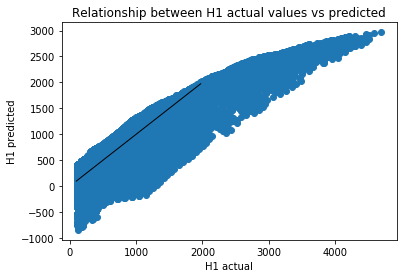

In [121]:
#1 dimensional test to provide a quick reference, but not significant 
plt.scatter(y_true, y_pred)
           connectionstyle="arc3,rad=0."), 
plt.annotate("",
               xy=(70, 70), xycoords='data',
               xytext=(2000, 2000), textcoords='data',
               arrowprops=dict(arrowstyle="-",
                               connectionstyle="arc3,rad=0."), 
              )
plt.xlabel("H1 actual")
plt.ylabel("H1 predicted")
plt.title("Relationship between H1 actual values vs predicted")
plt.show()

In [122]:
poly_test=poly_reg.fit_transform(np.array([[675, 4916, 2187]]))
linearreg_2.predict(poly_test);

In [125]:
test=pd.read_csv(nameoftester)
#import test values

In [126]:
test1=np.array(test)
# test1
test2=pd.DataFrame(test1)
#convert test values into a compatible panda dataframe

In [127]:
poly_testvar=poly_reg.fit_transform(test1)
z=linearreg_2.predict(poly_testvar)
z
test4=pd.DataFrame(z)
test4
result = pd.concat([test4, test2], axis=1, sort=False)
result
#predictions are combined with test value ready for exporting

,0,0,1,2
0,895.033649,500,2600,4100
1,768.808796,700,3550,2800
2,474.440090,700,2500,4600
3,1002.602889,800,3050,2500
4,276.749246,600,4800,2900
5,-386.769448,800,4900,3750
6,1607.809977,1200,2050,1000
7,-364.337333,650,4650,4400
8,1496.792835,1600,1200,1000
9,134.406787,950,5000,2000


In [128]:
np.savetxt(nameoffile, result, delimiter=",")